# 🚚 **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deberá entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el menú "Archivo" -> "Imprimir".

2. El enlace público de Google Colab. Para ello, vaya al botón de compartir y cambie la configuración de compartición a "Cualquier persona con el enlace".

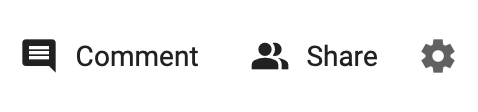

# Optimización de hiperparámetros con PCA y sin PCA para la predicción de pérdida de clientes en Empresas de Servicios de Telecomunicaciones (Churn) con regresión logística

Reducir las salidas y [deserciones de clientes](https://www.bain.com/insights/breaking-the-back-of-customer-churn/) se ha convertido en una alta prioridad para la mayoría de los proveedores de servicios de comunicaciones a medida que los mercados maduran y la competencia se intensifica.




En este documento usaremos una base de datos de una empresa de telecomunicaciones anónima [disponibilizada por IBM](https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv).

El principal objetivo es crear un model de aprendizaje automático basado en Regresión Logística (similar al propuesto [aquí con SVM](https://github.com/mmcuri/ds_handson/blob/master/Telecom_Churn_Prediction.ipynb)) para predecir la pérdida o salida de clientes en una empresa de telecomunicaciones.


## Librerías

Importamos varias bibliotecas y módulos útiles para el análisis de datos y el aprendizaje automático en Python. A continuación se describe cada uno de ellos:

- `pandas as pd`: Importa la biblioteca Pandas y la renombra como "pd". Pandas es una biblioteca popular utilizada para la manipulación y análisis de datos en Python.

- `numpy as np`: Importa la biblioteca NumPy y la renombra como "np". NumPy es una biblioteca de Python utilizada para realizar operaciones matemáticas en matrices y vectores.

- `matplotlib.pyplot as plt`: Importa la biblioteca Matplotlib y el módulo pyplot y lo renombra como "plt". Matplotlib es una biblioteca utilizada para la visualización de datos en Python.

- `from sklearn.metrics import classification_report`: Importa la función classification_report desde el módulo metrics de la biblioteca scikit-learn. classification_report es una función que calcula y muestra un informe de clasificación detallado para un modelo de clasificación.

- `from sklearn.metrics import confusion_matrix`: Importa la función confusion_matrix desde el módulo metrics de la biblioteca scikit-learn. confusion_matrix es una función que calcula y muestra la matriz de confusión para un modelo de clasificación.

- `from sklearn.metrics import accuracy_score`: Importa la función accuracy_score desde el módulo metrics de la biblioteca scikit-learn. accuracy_score es una función que calcula y muestra la precisión de un modelo de clasificación.

- `from sklearn.metrics import roc_auc_score`: Importa la función roc_auc_score desde el módulo metrics de la biblioteca scikit-learn. roc_auc_score es una función que calcula el área bajo la curva ROC (AUC) para un modelo de clasificación.

- `from sklearn.preprocessing import StandardScaler, LabelEncoder`: Importa las clases StandardScaler y LabelEncoder desde el módulo preprocessing de la biblioteca scikit-learn. StandardScaler es una clase utilizada para estandarizar los datos y LabelEncoder es una clase utilizada para codificar las etiquetas de clase en números enteros.

- `from sklearn.model_selection import train_test_split`: Importa la función train_test_split desde el módulo model_selection de la biblioteca scikit-learn. train_test_split es una función que divide los datos en conjuntos de entrenamiento y prueba para su uso en el modelado predictivo.

En resumen, este código importa varias bibliotecas y módulos que son útiles para el análisis de datos y el aprendizaje automático en Python.


In [1]:
# importing libraries
import pandas as pd #excel sofisticado
import numpy as np #matlab
import matplotlib.pyplot as plt #plots
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


## Base de datos

Este conjunto de datos contiene un total de 7043 clientes y 21 características de los mismos. De las entradas, 5174 son clientes activos y 1869 son clientes que la empresa ha perdido. Observe que el conjunto de datos está desbalanceado pues por cada cliente perdido existe casi 3 clientes activos. La variable de salida para nuestro modelo de machine learning será `Churn`.

In [2]:
# importamos dataset
DATA_PATH = "https://raw.githubusercontent.com/mtgca/datasets_public/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
#print(df)
# vemos las primeras 5 filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### *Detalles de la base de datos*

*	`customerID` - Custumer unique identifier
*	`gender` - Customer gender - ['Female' 'Male']
*	`SeniorCitizen` - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 of 65 years
*	`Partner` - - ['No' 'Yes']
*	`Dependents` - If customer has dependents - ['No' 'Yes']
*	`Tenure` - Customer lifespan (in months)
*	`PhoneService` - - ['No' 'Yes']
*	`MultipleLines` - - ['No' 'No phone service' 'Yes']
*	`InternetService` - - ['No' 'No internet service' 'Yes']
*	`OnlineSecurity` - - ['No' 'No internet service' 'Yes']
*	`OnlineBackup` - - ['No' 'No internet service' 'Yes']
*	`DeviceProtection` - - ['No' 'No internet service' 'Yes']
*	`TechSupport` - - ['No' 'No internet service' 'Yes']
*	`StreamingTV` - - ['No' 'No internet service' 'Yes']
*	`StreamingMovies` -  - ['No' 'No internet service' 'Yes']
*	`Contract` - Type of contract - ['Month-to-month' 'One year' 'Two year']
*	`PaperlessBilling` - - ['No' 'Yes']
*	`PaymentMethod` - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
*	`MonthlyCharges` - Monthly Recurring Charges
*	`TotalCharges` - Life time value
*	`Churn` - Churn value, the targer vector - ['No' 'Yes']





### *Limpieza del Dataset*

El código presenta una serie de operaciones de preprocesamiento de datos en una base de datos que contiene información sobre clientes de una compañía, incluyendo su género, edad, servicios contratados, pagos realizados, entre otros.

En primer lugar, se define la función get_df_size para imprimir el número de atributos y entradas de la base de datos.

Luego, se reemplazan los valores en blanco por NaN para facilitar el manejo de valores faltantes en la base de datos.

A continuación, se reemplazan los valores faltantes en la columna 'TotalCharges' por la mediana de esa columna y se convierte esa columna al tipo numérico.

Después, se elimina la columna 'customerID' ya que no es una característica relevante.

A continuación, se codifican las características binarias en 0's y 1's usando LabelEncoder y se imprimen las categorías correspondientes a cada una de estas características.


In [3]:
def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1],
        '\n# Entries: ', df.shape[0],'\n')

get_df_size(df)

#df.info()

# reemplaza valores en blanco por NaN
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

# reemplaza valores faltantes en TotalCharges por la mediana de TotalCharges.
#total_charges_median = df_clean.TotalCharges.median()

# **Change 1: Convert 'TotalCharges' to numeric before calculating median**
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# reemplaza valores faltantes en TotalCharges por la mediana de TotalCharges.
total_charges_median = df_clean.TotalCharges.median()


df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(pd.to_numeric)

#CustomerID lo retiramos porque no es una característica
df_clean = df_clean.drop('customerID', axis=1)
df_clean.describe()

print("Churn No Instances: ", df_clean[df_clean['Churn'] == 'No'].shape[0])
print("Churn Yes Instances: ", df_clean[df_clean['Churn'] == 'Yes'].shape[0])

binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]
df_proc = df_clean.copy()
#Etiquetas para características binarias
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[i].values))
#Dummy variables
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')
df_proc.head()


Dataset dimensions 
# Attributes:  21 
# Entries:  7043 

Churn No Instances:  5174
Churn Yes Instances:  1869
gender 
 [0 1]
SeniorCitizen 
 [0 1]
Partner 
 [0 1]
Dependents 
 [0 1]
PhoneService 
 [0 1]
PaperlessBilling 
 [0 1]
Churn 
 [0 1]
Original dataset: 
# Attributes:  21 
# Entries:  7043 

Processed dataset: 
# Attributes:  41 
# Entries:  7043 



C:\Users\JeffDRK\AppData\Local\Temp\ipykernel_7572\3018322231.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


### *División en conjunto de entrenamiento y test*

En el código, se divide el conjunto de datos df_proc en características y variable objetivo X e y, respectivamente. Luego, se realiza una división de los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn. Los conjuntos de entrenamiento y prueba se almacenan en X_train, X_test, y_train y y_test. La división se realiza de manera estratificada para asegurar que la proporción de instancias positivas y negativas en la variable objetivo se mantenga en ambos conjuntos. Se utiliza una proporción de 80/20 para los conjuntos de entrenamiento y prueba, respectivamente, y se fija una semilla aleatoria (random_state) en 42 para asegurar que los resultados sean reproducibles.

In [4]:
# dividimos df_proc en características y salida
X=df_proc.drop('Churn', axis=1) #features
y=df_proc['Churn'] #output, target

# Dividimos el conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### *Balanceo de datos*

Este código realiza el submuestreo (undersampling) de un conjunto de datos desbalanceado en términos de la variable objetivo. El submuestreo se utiliza para abordar el problema del desequilibrio de clases en el conjunto de datos, donde una o varias clases tienen muchas menos observaciones que las otras clases. En este caso, el modelo de aprendizaje automático puede estar sesgado hacia la clase mayoritaria, lo que puede resultar en un rendimiento deficiente en la clasificación de la clase minoritaria.

El submuestreo implica reducir el número de observaciones en la clase mayoritaria para equilibrar la distribución de las clases en el conjunto de datos. Esto puede mejorar el rendimiento del modelo en la clasificación de la clase minoritaria y reducir el sesgo hacia la clase mayoritaria.

La biblioteca imblearn se utiliza para realizar el submuestreo, y en este caso se importa la clase RandomUnderSampler. El objeto RandomUnderSampler se inicializa con random_state=1, lo que garantiza que los resultados serán reproducibles.

Luego, el submuestreo se realiza en el conjunto de entrenamiento (X_train, y_train) mediante el método fit_resample del objeto rus. Los datos submuestreados se almacenan en X_train_rus y y_train_rus.

Para evaluar el efecto del submuestreo, se utiliza la función get_df_size, que devuelve el tamaño del conjunto de datos. Primero se imprime el tamaño del conjunto de entrenamiento original (X_train, y_train) antes del submuestreo, y luego se imprime el tamaño del conjunto submuestreado (X_train_rus, y_train_rus) después de aplicar el submuestreo.

Finalmente, se utiliza la función np.unique para verificar que las categorías de la variable objetivo (y_train_rus) estén balanceadas. La función devuelve una tupla que contiene las categorías únicas y el número de instancias en cada categoría. Al utilizar return_counts=True, se garantiza que se devuelvan los recuentos de las categorías.

In [5]:
# submuestreo -> under sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_undersampled, header='After balancing:')

# verificamos que las categorias estén balanceadas
np.unique(y_train_undersampled, return_counts=True)


Before balancing: 
# Attributes:  40 
# Entries:  5634 

After balancing: 
# Attributes:  40 
# Entries:  2990 



(array([0, 1]), array([1495, 1495]))

## Modelo de Machine Learning

Este código construye un modelo de regresión logística para un conjunto de datos y lo evalúa en un conjunto de datos de prueba y de entrenamiento.

Primero, se define una tubería (pipeline) que encadena tres pasos:

PolynomialFeatures(degree=2): Crea una matriz de características polinómicas de grado 2 a partir de las características originales.
StandardScaler(): Estandariza las características.
LogisticRegression(max_iter=20000, penalty='l2', C=1/lambda_value): Ajusta un modelo de regresión logística a los datos, utilizando una regularización L2 (Ridge) y un parámetro de regularización C inversamente proporcional a lambda_value.
Luego, el modelo se entrena en un conjunto de datos de entrenamiento (X_train_undersampled e y_train_undersampled) utilizando el método fit.

A continuación, el modelo se evalúa en un conjunto de datos de prueba (X_test e y_test). Las predicciones se obtienen con el método predict y se calcula la precisión (accuracy) utilizando metrics.accuracy_score. La precisión en el conjunto de datos de prueba se almacena en la variable acc_test y se imprime en pantalla.

Finalmente, se evalúa el modelo en el conjunto de datos de entrenamiento (X_train_undersampled e y_train_undersampled) y se almacena la precisión en la variable acc_train, que también se imprime en pantalla.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics

model_logreg =  Pipeline([
                ('polynomial_features', PolynomialFeatures(degree=2)), #no cambiar
                ('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())
 ])

# training
model_logreg.fit(X_train_undersampled, y_train_undersampled)

# evaluation on test set
pred_test = model_logreg.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)

print("Para el modelo NO optimizado, métricas en el conjunto de test: recall = ", recall, ", F1 = ", f1score, ", acc = ", acc, ", precision = ", preci, )


Para el modelo NO optimizado, métricas en el conjunto de test: recall =  0.7647058823529411 , F1 =  0.6033755274261603 , acc =  0.7331440738112136 , precision =  0.49825783972125437


d:\Users\Documents\Maestria\Semana_1_AS\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Optimización de Hiperparámetros Logistic Regression con kfold CV sin PCA

Usamos k-fold cross-validation (ver `GridSearchCV` y  `StratifiedKFold`) para optimizar los siguientes hiperparámetros de Logistic Regression en el conjunto de entrenamiento balanceado (`X_train_undersampled`, `y_train_undersampled`):

1. lambda: parámetro de regularización que es inverso al valor de lambda estudiado en clase. Se utilizará los siguientes valores [ 1e-4, 1e-3, 1e-2, 0.1]
2. penalty: tipo de regularización para evitar overfitting. Se utilizará 'l2' y 'l1'.

Para la optimización de hiperparámetros utilizamos como métrica al recall.

Una vez optimizados los hiperparámetros, reentrenamos el clasificador con los mejores hiperparámetros encontrados. Finalmente, evaluamos este último clasificador en el conjunto de test `X_test`, `y_test`.)

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

t_init=time.time() #inicializa el tiempo
save_dat={}
#optimización
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=45) #para nsplits=5 demora 35 min approx en google colab.

# pipeline
pipeline_log_reg = Pipeline([
     ('polynomial_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('logistic_reg', LogisticRegression(max_iter=20000, solver='saga'))
])

lambda_range = [1e-4, 1e-3, 1e-2, 0.1]
C_range = [1 / (lambda_value) for lambda_value in lambda_range] #transforma al inverso de lambda
param_grid = {'logistic_reg__C': C_range,
              'logistic_reg__penalty': ['l2', 'l1']}

search = GridSearchCV(pipeline_log_reg,
                      param_grid, scoring='recall',
                      cv=kfold,
                      verbose=4,
                      n_jobs=-1) #use all available CPUs
result = search.fit(X_train_undersampled, y_train_undersampled)

print(f'Mejor recall en el conj. de validación: {result.best_score_} para {result.best_params_}')

#reentreno con mejores
pipeline_log_reg.set_params(logistic_reg__C=result.best_params_['logistic_reg__C'],
                       logistic_reg__penalty=result.best_params_['logistic_reg__penalty'],)
pipeline_log_reg.fit(X_train_undersampled, y_train_undersampled)

#evaluamos en el conjunto de test
pred_test = pipeline_log_reg.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)
t_end=time.time()-t_init #finaliza el tiempo
save_dat["NO PCA"]= [f1score, acc, preci, recall, t_end]

print("Para el modelo optimizado, métricas en el conjunto de test: recall = ", recall, ", F1 = ", f1score, ", acc = ", acc, ", precision = ", preci, )


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejor recall en el conj. de validación: 0.765886287625418 para {'logistic_reg__C': 100.0, 'logistic_reg__penalty': 'l2'}
Para el modelo optimizado, métricas en el conjunto de test: recall =  0.7700534759358288 , F1 =  0.6063157894736843 , acc =  0.7345635202271115 , precision =  0.5


### Optimización de hiperparámetros Logistic Regression con PCA

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import time

t_init = time.time()  # inicializa el tiempo
# optimización
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=45
)  # para nsplits=5 demora 35 min approx en google colab.

# pipeline
pipeline_log_reg_pca = Pipeline(
    [
        ("polynomial_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),  # zscore
        (
            "pca",
            PCA(n_components=0.95),
        ),  # comprime: 95% variance retained (information retained)
        ("logistic_reg", LogisticRegression(max_iter=20000, solver="saga")),
    ]
)

lambda_range = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1]
C_range = [
    1 / (lambda_value) for lambda_value in lambda_range
]  # transforma al inverso de lambda
param_grid = {"logistic_reg__C": C_range, "logistic_reg__penalty": ["l2", "l1"]}

search = GridSearchCV(
    pipeline_log_reg_pca, 
    param_grid, 
    scoring="recall", 
    cv=kfold, 
    verbose=4,
    n_jobs=-1,  # use all available CPUs
)
result = search.fit(X_train_undersampled, y_train_undersampled)

print(
    f"Mejor recall en el conj. de validación: {result.best_score_} para {result.best_params_}"
)

# reentreno con mejores
pipeline_log_reg_pca.set_params(
    logistic_reg__C=result.best_params_["logistic_reg__C"],
    logistic_reg__penalty=result.best_params_["logistic_reg__penalty"],
)
pipeline_log_reg_pca.fit(X_train_undersampled, y_train_undersampled)

# evaluamos en el conjunto de test
pred_test = pipeline_log_reg_pca.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)
t_end = time.time() - t_init  # finaliza el tiempo
save_dat["PCA"] = [f1score, acc, preci, recall, t_end]
print(
    "Para el modelo optimizado, métricas en el conjunto de test: recall = ",
    recall,
    ", F1 = ",
    f1score,
    ", acc = ",
    acc,
    ", precision = ",
    preci,
)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Mejor recall en el conj. de validación: 0.7759197324414716 para {'logistic_reg__C': 10000000.0, 'logistic_reg__penalty': 'l2'}
Para el modelo optimizado, métricas en el conjunto de test: recall =  0.7620320855614974 , F1 =  0.6038135593220338 , acc =  0.7345635202271115 , precision =  0.5


### ✅ **Actividad 1: Análisis de resultados: Optimización de hiperparámetros Regresión Logística**

Ejecute el código de esta notebook y analice los siguientes casos:

1. Logistic Regression sin PCA
2. Logistic Regression con PCA


Comente sus resultados analizando los valores de recall, f1 score, accuracy y precisión en el conjunto de test.

Los resultados que se muestran en la figura de abajo, reclacan que los rssultados son parecidos, varian por una milesima en la mayoria de los casos 

Cuál es mejor en términos de recall?

El que tiene mejor Recall es el que no se efectua con sin PCA sin embargo las diferencia es minima  no tiene diferencia significativa, unicamente tiene  1 milesima de diferencia

Cuál demora menos en entrenar? Vale la pena usar PCA? Considere si el resultado sin PCA justifica el entrenamiento más largo.

Como se muestra en la figura de abajo el tiempo si varia significativamente, la diferencia es abismal entrenando con PCA se demora 16.4s en entrenar es un tiempo muy corto. 
Si vale la pena usar PCA en este caso debido al tiempo bajo que tiene para entrenar con los mismo resultado que sin PCA

Por qué cree que el recall es una métrica más adecuada para este problema? Tip: El recall está relacionado a los falsos negativos. Analice por qué es importante disminuir los falsos negativos en el churn.

Es este problema es adecuado debido a que es un analisis de clientes, me interesa saber cuando porcentaje True Positive tiene el modelo y ver la eficiencia del modelo para predecir cuantos clientes podrian cancelar y tomar medidas antes de que eso pase, ademas que el churn esta en positivo me interesa saber el analisis en verdadero 




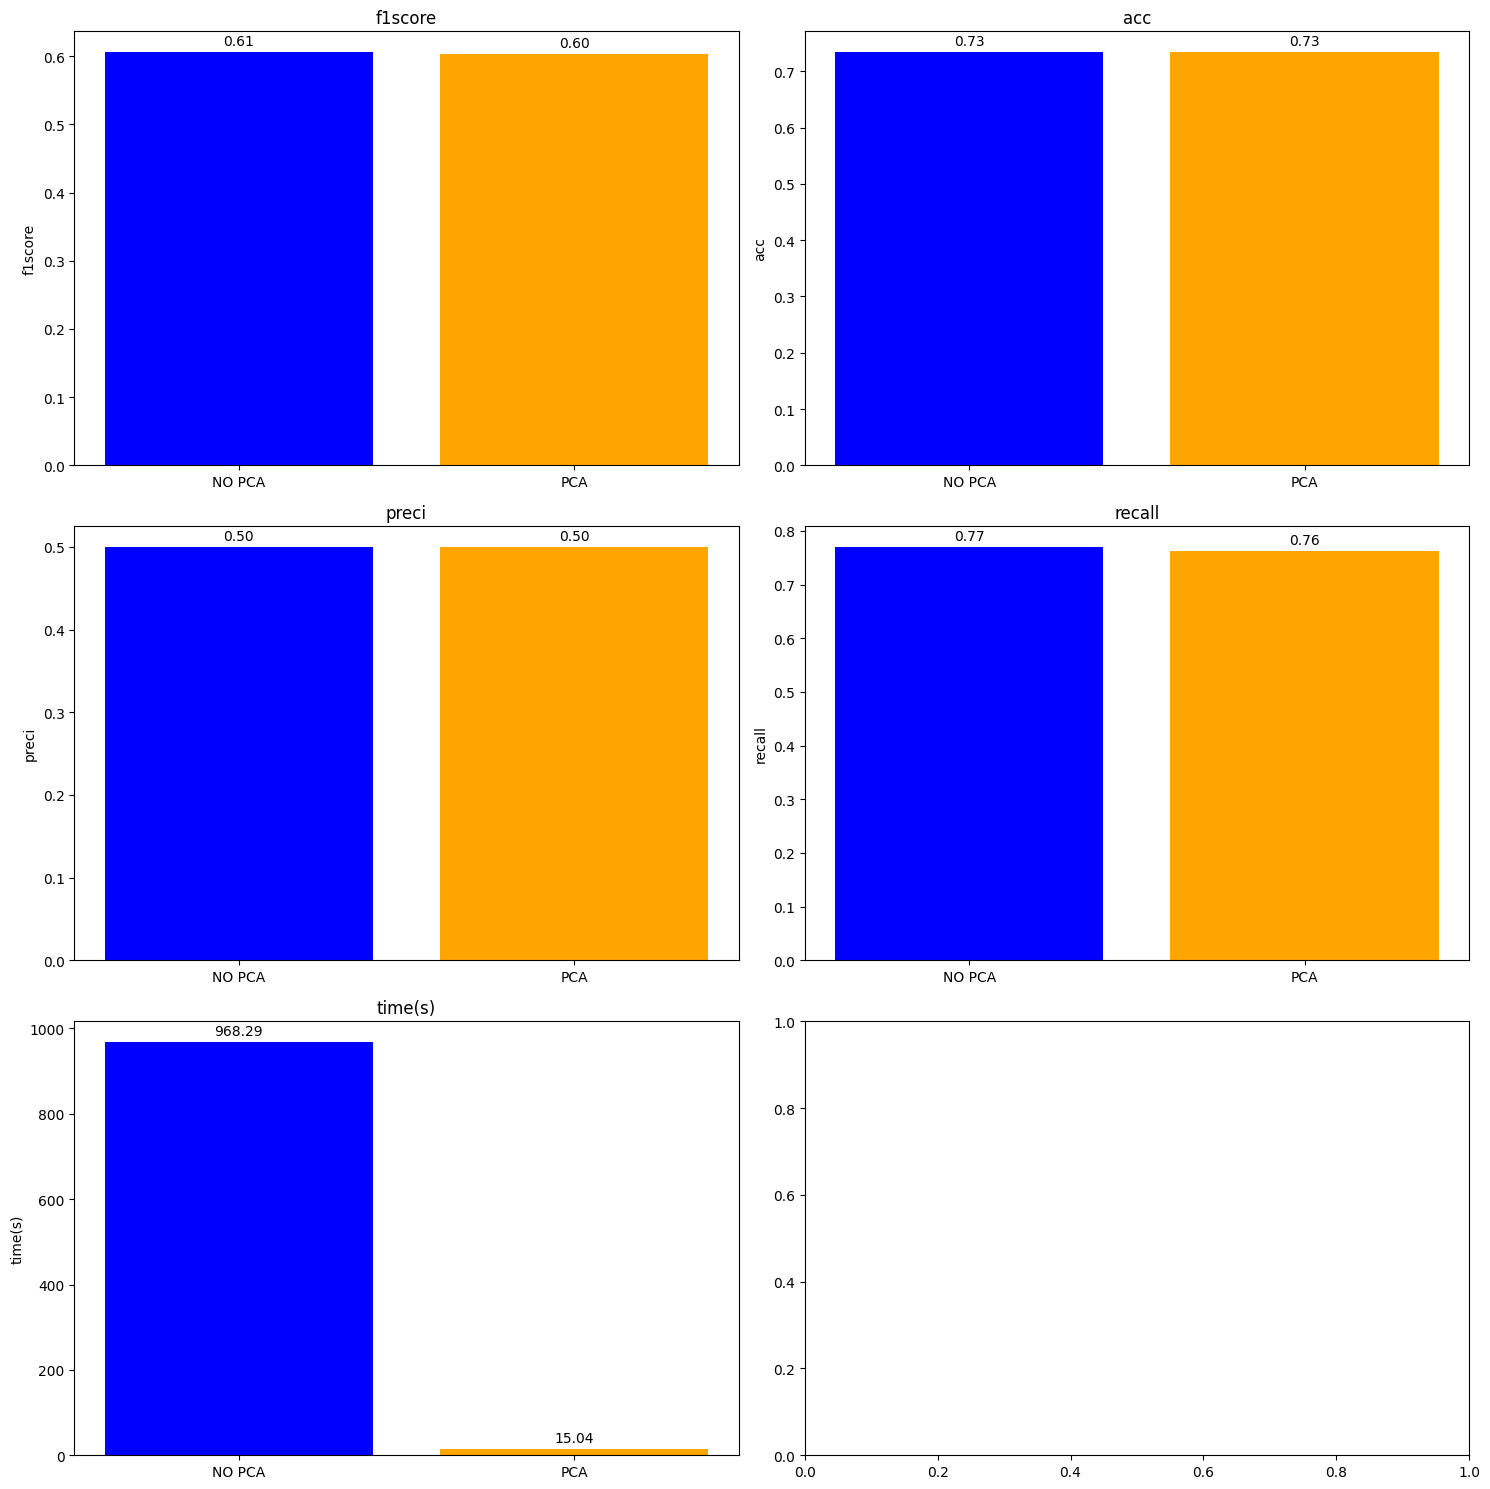

In [9]:
met = ["f1score", "acc", "preci", "recall", "time(s)"]
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, metric in enumerate(met):
    values = [save_dat["NO PCA"][i], save_dat["PCA"][i]]
    bars = axes[i].bar(save_dat.keys(), values, color=['blue', 'orange'])

    # Agregar etiquetas numéricas sobre cada barra
    axes[i].bar_label(bars, fmt='%.2f', padding=3)

    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    #axes[i].set_xlabel("Modelos")

plt.tight_layout()
plt.show()


# ✅ **Actividad**: Feature selection y repeated k fold cv

Crear un pipeline con las siguientes etapas usando **repeated kfold cv:**

1. **Feature selection** (método filter)
2.Polynomial features con degree 2
3. Scaler
4. PCA
5. Logistic Regression

Optimizar los param. de logistic regression.
Evaluar en el conjunto de test.


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA

t_init = time.time()  # inicializa el tiempo
#optimización
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=45) #para nsplits=5 demora 35 min approx en google colab.

# pipeline
pipeline_log_reg_pca = Pipeline([
    ("select_filter", SelectKBest(mutual_info_classif, k=20)), #k=20 features
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()), #zscore
    ('pca', PCA(n_components=0.95)), #comprime: 95% variance retained (information retained)
    ('logistic_reg', LogisticRegression(max_iter=20000, solver='saga'))
])

lambda_range = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1]
C_range = [1 / (lambda_value) for lambda_value in lambda_range] #transforma al inverso de lambda
param_grid = {'logistic_reg__C': C_range,
              'logistic_reg__penalty': ['l2', 'l1']}

search = GridSearchCV(pipeline_log_reg_pca, 
                      param_grid, 
                      scoring='recall', 
                      cv=kfold, 
                      verbose=4,
                      n_jobs=-1) #use all available CPUs
result = search.fit(X_train_undersampled, y_train_undersampled)

print(f'Mejor recall en el conj. de validación: {result.best_score_} para {result.best_params_}')

#reentreno con mejores
pipeline_log_reg_pca.set_params(logistic_reg__C=result.best_params_['logistic_reg__C'],
                       logistic_reg__penalty=result.best_params_['logistic_reg__penalty'],)
pipeline_log_reg_pca.fit(X_train_undersampled, y_train_undersampled)

#evaluamos en el conjunto de test
pred_test = pipeline_log_reg_pca.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)
t_end = time.time() - t_init  # finaliza el tiempo
save_dat["Filter PCA"]= [f1score, acc, preci, recall, t_end]
print("Para el modelo optimizado, métricas en el conjunto de test: recall = ", recall, ", F1 = ", f1score, ", acc = ", acc, ", precision = ", preci, )


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Mejor recall en el conj. de validación: 0.7812709030100333 para {'logistic_reg__C': 1000000.0, 'logistic_reg__penalty': 'l2'}
Para el modelo optimizado, métricas en el conjunto de test: recall =  0.7620320855614974 , F1 =  0.6122448979591837 , acc =  0.7437899219304471 , precision =  0.5116696588868941


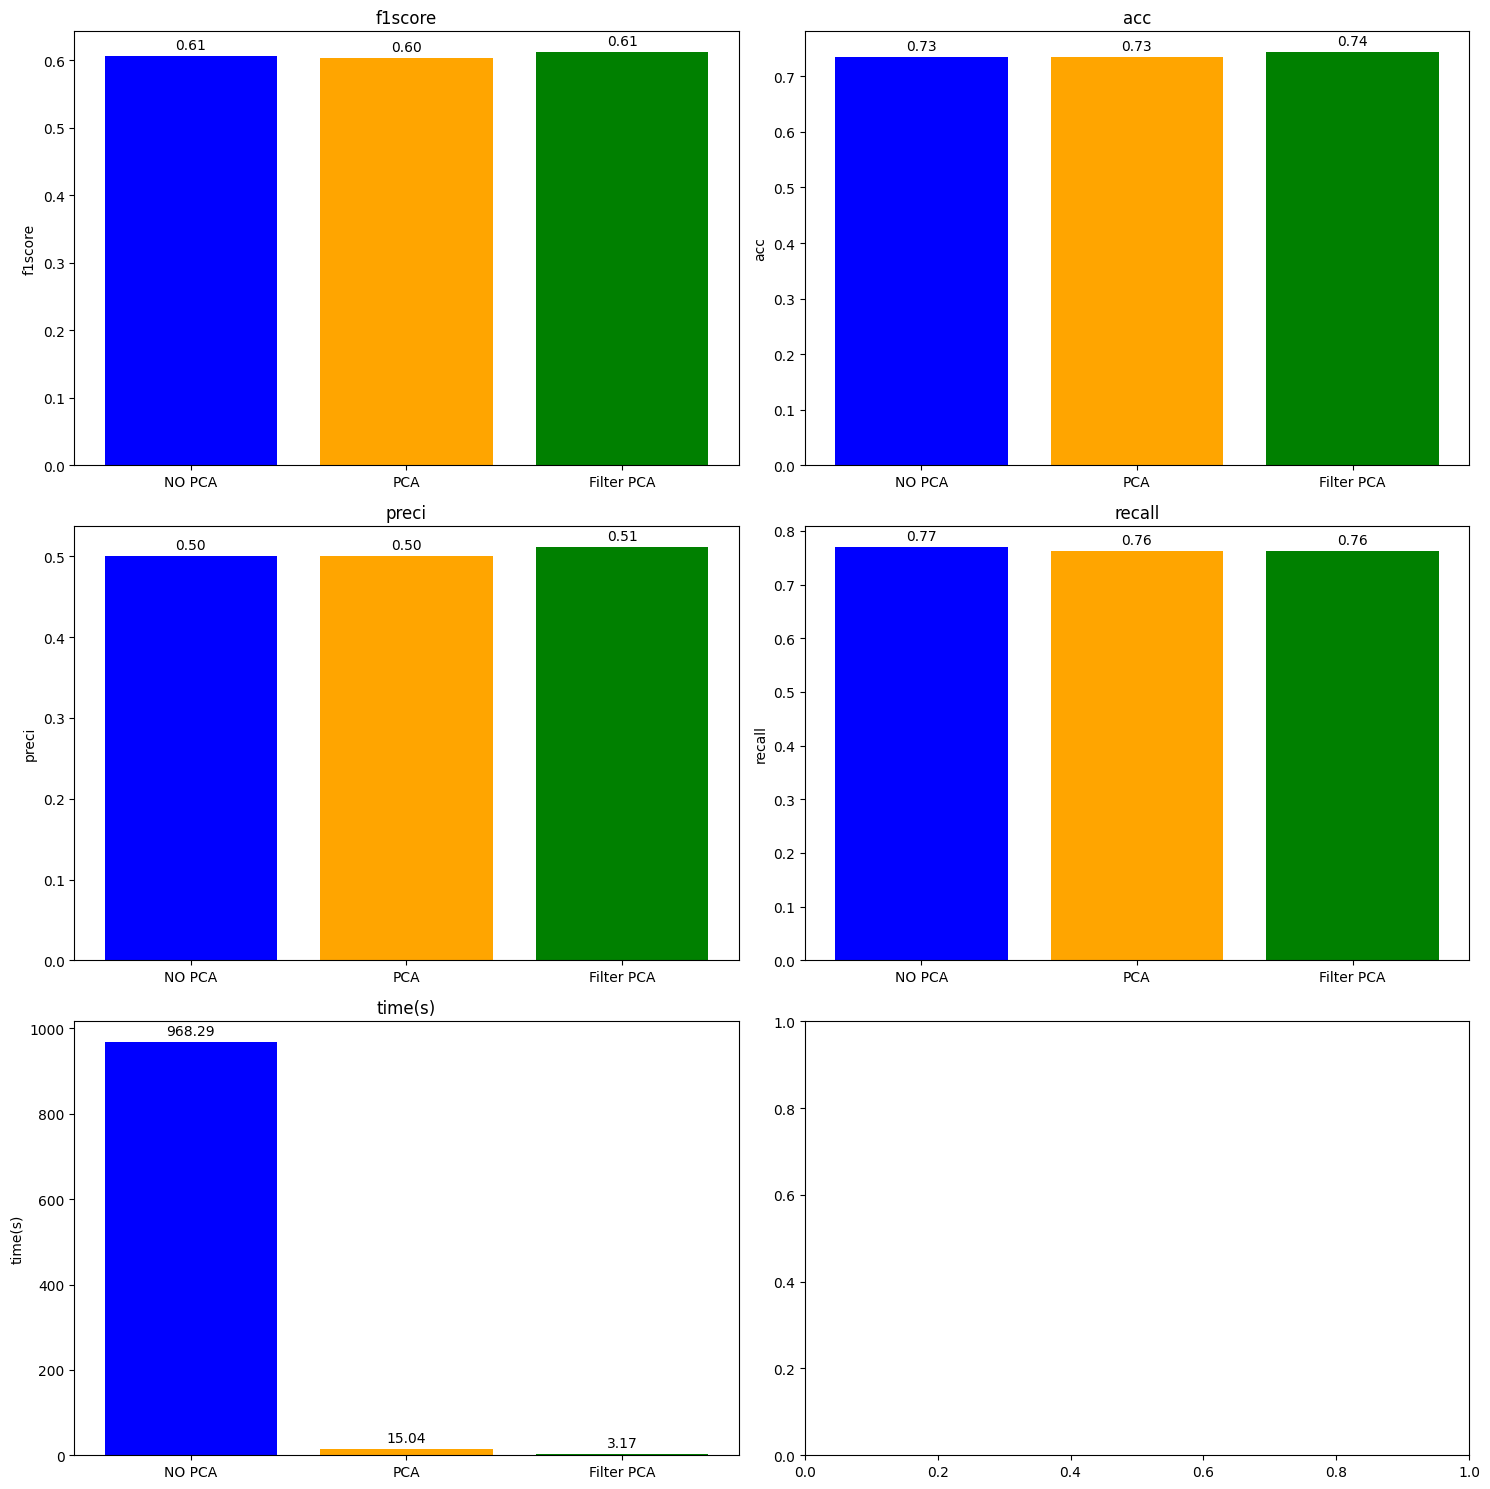

In [ ]:
met = ["f1score", "acc", "preci", "recall", "time(s)"]
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, metric in enumerate(met):
    values = [save_dat["NO PCA"][i], save_dat["PCA"][i], save_dat["Filter PCA"][i]]
    bars = axes[i].bar(save_dat.keys(), values, color=['blue', 'orange', 'green'])

    # Agregar etiquetas numéricas sobre cada barra
    axes[i].bar_label(bars, fmt='%.2f', padding=3)

    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()
